# Analyse Exploratoire des Données (EDA) - Dashboard Météo (2015-2025)

**Objectif :** Étudier les cycles climatiques et détecter les anomalies thermiques sur une période de 10 ans à Cotonou.

**Données :** Températures (moyenne, min, max) et précipitations issues de la station Meteostat ID 65344.

### Importation des bibliothèques à utiliser

In [29]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Accès aux modules personnalisés

In [45]:
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))
from src.data_cleaner import clean_weather_data
from src.data_loader import load_local_data
from src.analysis import calculate_trends, get_descriptive_stats, analyze_anomalies
from src.visualization import (
    plot_temperature_trend, 
    plot_precipitation_bar, 
    plot_temperature_heatmap, 
    plot_seasonal_boxplot
)

### Chargement des données brutes

In [ ]:
# Chargement et nettoyage immédiat
raw_data = load_local_data(65344)
data = clean_weather_data(raw_data)
data = calculate_trends(data) # Ajout de la moyenne mobile

## 1. Vue d'ensemble statistique
Nous calculons les mesures de tendance centrale et identifions les records locaux.

In [44]:
print("--- Statistiques Descriptives ---")
display(get_descriptive_stats(data))

# Détection des anomalies
anomalies = analyze_anomalies(data)
print(f"\nNombre d'anomalies thermiques détectées : {len(anomalies)}")

--- Statistiques Descriptives ---


,temp,tmin,tmax,prcp
count,2658.000000,2658.000000,2658.000000,2658.000000
mean,27.939391,25.067889,30.958728,2.409443
std,1.516442,1.427777,1.866398,9.851704
min,23.600000,17.200000,25.300000,0.000000
25%,26.700000,24.315714,29.400000,0.000000
50%,28.100000,25.000000,31.300000,0.000000
75%,29.200000,25.900000,32.400000,0.000000
max,31.300000,30.000000,39.500000,168.100000



Nombre d'anomalies thermiques détectées : 23


## 2. Analyse de la saisonnalité et des valeurs aberrantes
Le graphique suivant (Boxplot) permet de visualiser la distribution thermique par saison.

**Note sur les "ronds" (Outliers) :** Les points isolés sous les moustaches représentent des **épisodes de fraîcheur exceptionnels**. Ils ne sont pas des erreurs de mesure mais des événements climatiques rares pour la région.

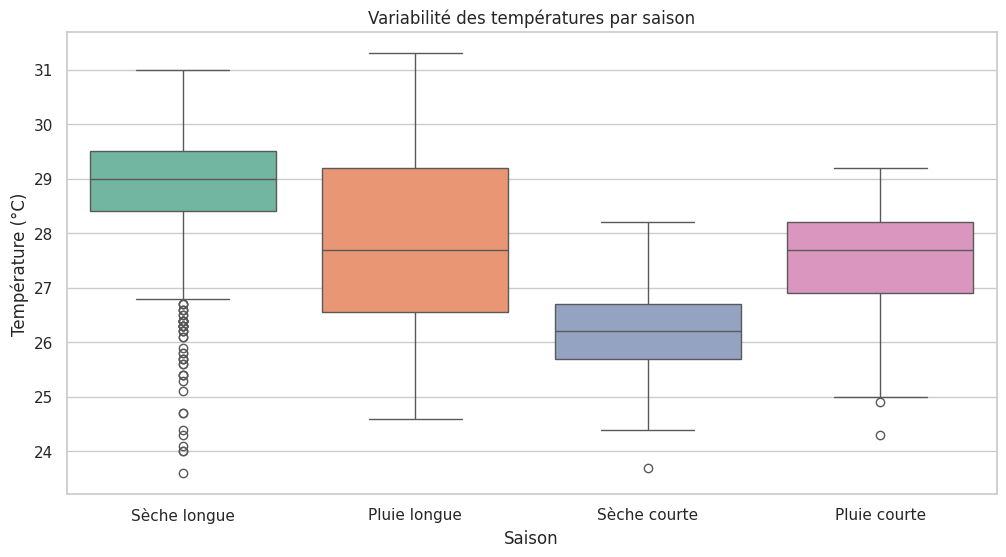

In [41]:
plot_seasonal_boxplot(data)
plt.show()

## 3. Évolution annuelle (Heatmap)
Cette visualisation permet de repérer si certaines années ont été globalement plus chaudes que d'autres.

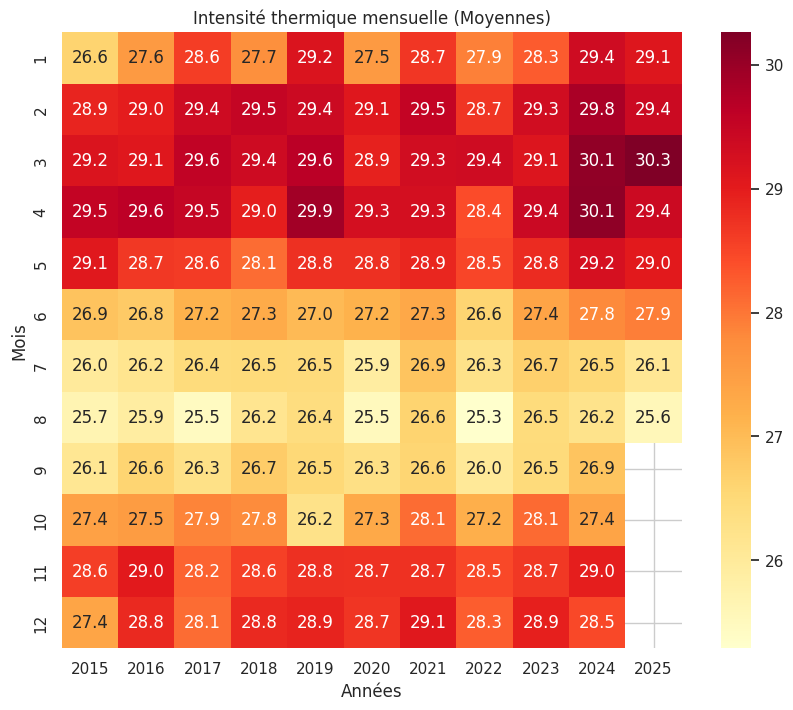

In [42]:
plot_temperature_heatmap(data)
plt.show()

## Synthèse de l'Analyse

1. **Stabilité :** La saison des pluies présente la plus faible variabilité thermique.

2. **Événements extrêmes :** 23 jours ont été identifiés comme anormalement chauds sur la période.

3. **Tendances :** Les outliers froids observés en saison sèche indiquent des baisses de température ponctuelles qui mériteraient une étude sur l'influence des vents locaux (Harmattan).